# CP3403 Data Mining
## Report: Credit Card Fraud

### Group: Matthew Marsh, Dannielle Jones and Callum Gracie

This data mining explores: 

# Import Packages and Get Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from datetime import datetime, date

In [2]:
data = pd.read_csv('fraudTrain.csv')  # Read
#pd.set_option('display.float_format', lambda x:'%f'%x)  # Format

In [3]:
#print('Number of Records: {}'.format(len(data)))
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
data.head()

Dataset rows: 1296675 columns: 23


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Pre-Processing: NaN Data and Missing Data

In [4]:
# Check dataset for missing or NaN values
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
missing_values_count = data.isna().sum()
print(missing_values_count)

Dataset rows: 1296675 columns: 23
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


# Pre-Processing: Convert and Format Data

In [5]:
# View the unnamed column, then get and rename
print(data.iloc[:,0])
data = data.rename(columns={data.columns[0]: "column_id"})
data.set_index('column_id', inplace=True)
data.head()

0                0
1                1
2                2
3                3
4                4
            ...   
1296670    1296670
1296671    1296671
1296672    1296672
1296673    1296673
1296674    1296674
Name: Unnamed: 0, Length: 1296675, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# Convert to numeric
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')
data['zip'] = pd.to_numeric(data['zip'], errors='coerce')
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data['city_pop'] = pd.to_numeric(data['city_pop'], errors='coerce')
data['merch_lat'] = pd.to_numeric(data['merch_long'], errors='coerce')
data['is_fraud'] = pd.to_numeric(data['is_fraud'], errors='coerce')

In [7]:
# Processing date of birth
data['dob'] = pd.to_datetime(data['dob'])  # convert to datetime object
data['year_of_birth'] = data['dob'].dt.year  # extract year
data['month_of_birth'] = data['dob'].dt.month  # extract month
data['day_of_birth'] = data['dob'].dt.day  # extract day
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,-82.048315,-82.048315,0,1988,3,9
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,-118.186462,-118.186462,0,1978,6,21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,-112.154481,-112.154481,0,1962,1,19
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,-112.561071,-112.561071,0,1967,1,12
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,-78.632459,-78.632459,0,1986,3,28


In [8]:
# Processing transaction date and time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # convert to datetime object
data['year_of_trans'] = data['trans_date_trans_time'].dt.year  # extract year
data['month_of_trans'] = data['trans_date_trans_time'].dt.month  # extract month
data['day_of_trans'] = data['trans_date_trans_time'].dt.day  # extract day
data['time_of_trans'] = data['trans_date_trans_time'].dt.time  # extract time
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,-82.048315,0,1988,3,9,2019,1,1,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,-118.186462,0,1978,6,21,2019,1,1,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,-112.154481,0,1962,1,19,2019,1,1,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,-112.561071,0,1967,1,12,2019,1,1,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,-78.632459,0,1986,3,28,2019,1,1,00:03:06


In [9]:
# Processing Gender into binary
gender_count = data['gender'].value_counts()
data['is_female'] = data['gender'].apply(lambda x: 1 if x.upper() == "F" else 0)
is_female_count = data['is_female'].value_counts()
print("Gender Count: \n{}".format(gender_count))
print("is_female Count: \n{}".format(is_female_count))
data.head()

Gender Count: 
gender
F    709863
M    586812
Name: count, dtype: int64
is_female Count: 
is_female
1    709863
0    586812
Name: count, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans,is_female
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,1988,3,9,2019,1,1,00:00:18,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,1978,6,21,2019,1,1,00:00:44,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,1962,1,19,2019,1,1,00:00:51,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,1967,1,12,2019,1,1,00:01:16,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,1986,3,28,2019,1,1,00:03:06,0


# Pre-Processing: Create Data Sub-Set

In [10]:
# Create a sub-set
sub1 = data[(data['is_female'] == 1) & (data['year_of_birth'] == 1990)]
print('Subset rows: {} columns: {}'.format(sub1.shape[0], sub1.shape[1]))
sub1.head()

Subset rows: 20063 columns: 30


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans,is_female
column_id,,,,,,,,,,,,,,,,,,,,,
161,2019-01-01 01:59:23,4646845581490336108,"fraud_Monahan, Bogisich and Ledner",misc_pos,10.26,Julia,Bell,F,576 House Crossroad,West Sayville,...,-73.523504,0,1990,6,25,2019,1,1,01:59:23,1
293,2019-01-01 03:49:56,4646845581490336108,fraud_Block Group,misc_pos,1.10,Julia,Bell,F,576 House Crossroad,West Sayville,...,-72.974367,0,1990,6,25,2019,1,1,03:49:56,1
360,2019-01-01 04:42:23,38588538868506,"fraud_Schaefer, Maggio and Daugherty",gas_transport,60.20,Jacqueline,Curry,F,3047 Jeff Place,Marathon,...,-103.852785,0,1990,11,23,2019,1,1,04:42:23,1
381,2019-01-01 05:01:34,4939976756738216,"fraud_Bernier, Streich and Jewess",grocery_net,49.54,Michelle,Johnston,F,3531 Hamilton Highway,Roma,...,-99.814054,0,1990,11,7,2019,1,1,05:01:34,1
404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,Lanark Village,...,-83.837856,0,1990,1,24,2019,1,1,05:19:42,1


In [11]:
# Check how many cases are fraud
is_fraud_count = sub1[(sub1['is_fraud'] == 1)]
print('Fraud count: {}'.format(len(is_fraud_count)))
is_fraud_count.head()

# Counts of Categories
counts = data['category'].value_counts()
print(counts)

Fraud count: 88
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


# Data Mining Technique/Method: K-means Clustering
## Visualisation: Pre-Processing

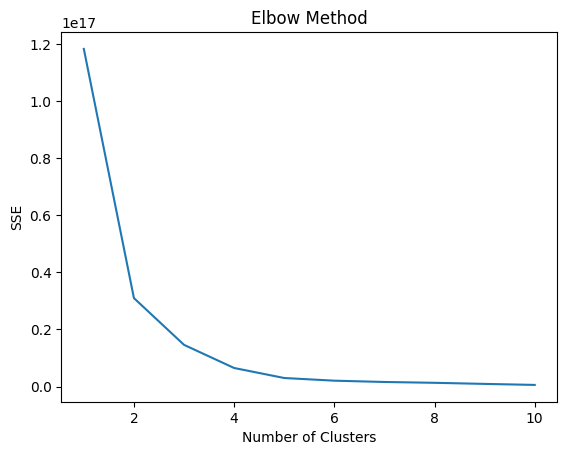

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Create new subset of the fraud data
k_means_subset = data.copy()

# Calculate age by subtracting DOB year from transaction year
k_means_subset['age'] = k_means_subset['year_of_trans'] - k_means_subset['year_of_birth']

# Choose the features to check
kmeans_selected_features = k_means_subset[['is_fraud', 'city_pop', 'age']]

# Using the Elbow Method to find the optimal number of clusters
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=42)
    kmeans.fit(kmeans_selected_features)
    SSE.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1,11), SSE)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


## Visualisation: Plots/Graphs

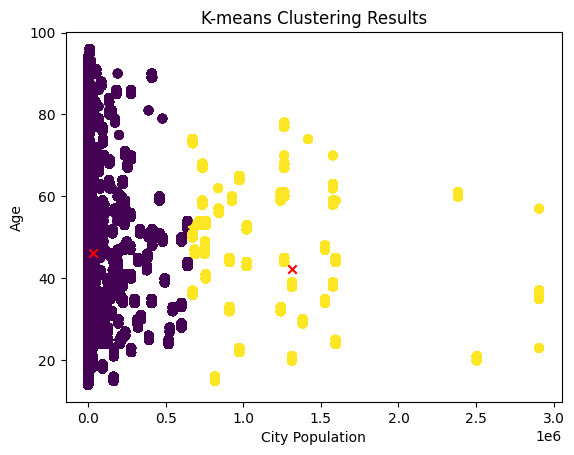

In [69]:
# Run the K-means clustering
num_of_clusters = 2 # Determined from the Elbow Method
kmeans = KMeans(n_clusters=num_of_clusters, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(kmeans_selected_features[['city_pop', 'age']])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the Centroids of the clusters
centroids = kmeans.cluster_centers_

# The scatter plot of the clusters
plt.scatter(kmeans_selected_features['city_pop'], kmeans_selected_features['age'], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
plt.xlabel('City Population')
plt.ylabel('Age')
plt.title('K-means Clustering Results')
plt.show()


## Visualisation: Results and Data

In [80]:
# Access the coordinates of the first centroid
centroid_0_city_pop = centroids[0, 0].round(0)
centroid_0_age = centroids[0, 1].round(0)

# Access the coordinates of the second centroid
centroid_1_city_pop = centroids[1, 0].round(0)
centroid_1_age = centroids[1, 1].round(0)

# Print the centroid coordinates
print("Centroid 0: (City Population, Age) = ({}, {})".format(centroid_0_city_pop, centroid_0_age))
print("Centroid 1: (City Population, Age) = ({}, {})".format(centroid_1_city_pop, centroid_1_age))

Centroid 0: (City Population, Age) = (33747.0, 46.0)
Centroid 1: (City Population, Age) = (1310634.0, 42.0)


In [78]:
# Find the Fraud Frequency per cluster to find a relationship between Fraud, Age and City Population
cluster_fraud_df = pd.DataFrame({'Cluster': clusters, 'Fraud': kmeans_selected_features['is_fraud']})
fraud_frequency = cluster_fraud_df.groupby('Cluster')['Fraud'].sum()

print("Fraud Frequency per Cluster: \n{}".format(fraud_frequency))


Fraud Frequency per Cluster: 
Cluster
0    7177
1     329
Name: Fraud, dtype: int64


#### Results Discussion

Based on the K-means cluster comparing the features Age, is_fraud and City_Pop, it can be determined that the majority of confirmed fraudulent transactions happen in the first centroid. The first centroid and the majority of fraudulent transactions happen with people on average at the Age of 46 and in smaller cities with the city population of 33,747.

Further exploration of the K-means results suggest that of this particular dataset, only a minority of the fraudulent cases occur in the larger cities (1,310,634 pop.) and in a lower average age of 42.

# Data Mining Technique/Method: ARM
## Visualisation: Pre-Processing

### Fraud Transactions Subset

In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Make a data subset
apriori_fraud_subset = data[data['is_fraud'] == 1].copy()
apriori_subset = apriori_fraud_subset[['merchant', 'category', 'is_female', 'city', 'job']].copy()

# Create columns for each encoded category
encoded_categories = pd.get_dummies(apriori_subset[['merchant', 'category', 'job', 'city']], prefix_sep='_')
apriori_subset_encoded = pd.concat([apriori_subset, encoded_categories], axis=1)

# Convert non-boolean columns to boolean type
non_bool_columns = ['merchant', 'category', 'job', 'city']
apriori_subset_encoded[non_bool_columns] = apriori_subset_encoded[non_bool_columns].astype(bool)

# Drop the original columns
apriori_subset_encoded.drop(['merchant', 'category', 'job', 'city'], axis=1, inplace=True)

#### Comparing Gender, Age and Job groups

In [73]:
# Create new subset of the fraud data
fraud_transactions = data[data['is_fraud'] == 1].copy()

# Calculate age by subtracting DOB year from transaction year
fraud_transactions['age'] = fraud_transactions['year_of_trans'] - fraud_transactions['year_of_birth']

# Create two new categories for those below fifty and fifty plus
fraud_transactions['fifty plus'] = fraud_transactions['age'] >= 50
fraud_transactions['fifty plus'] = fraud_transactions['fifty plus'].astype(bool)

fraud_transactions['below fifty'] = fraud_transactions['age'] < 50
fraud_transactions['below fifty'] = fraud_transactions['below fifty'].astype(bool)

# Create a subset of Gender, Age, and Job
apriori_gaj_subset = fraud_transactions[['gender', 'below fifty', 'fifty plus', 'job']].copy()

# Create columns for each encoded category
gaj_encoded_categories = pd.get_dummies(apriori_gaj_subset, columns=['gender', 'job'], prefix_sep='_')
gaj_subset_encoded = pd.concat([apriori_gaj_subset, gaj_encoded_categories], axis=1)

# Create columns for the Gender and Age Categories
gender_age_encoded = pd.get_dummies(apriori_gaj_subset[['gender']], prefix='', prefix_sep='')
gender_age_encoded = pd.concat([apriori_gaj_subset, gender_age_encoded], axis=1)

# Drop the original columns
gaj_subset_encoded.drop(['gender', 'job'], axis=1, inplace=True)
gender_age_encoded.drop(['gender', 'job'], axis=1, inplace=True)


## Visualisation: Plots/Graphs

#### Fraud Transactions Subset

In [75]:
# Apply the Apriori Algorithm

frequent_itemsets = apriori(apriori_subset_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Generate Association Rules
apriori_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort the Association Rules by Support
sorted_apriori_rules = apriori_rules.sort_values(by='confidence', ascending=False)

print(sorted_apriori_rules)

                                    antecedents   
57          (merchant_fraud_Gleason-Macejkovic)  \
69                 (job_Sales professional, IT)   
76  (merchant_fraud_Baumbach, Feeney and Morar)   
23                         (job_Prison officer)   
47             (merchant_fraud_Kerluke-Abshire)   
..                                          ...   
75                       (category_grocery_pos)   
16                                  (is_female)   
22                                  (is_female)   
58                                  (is_female)   
68                                  (is_female)   

                       consequents  antecedent support  consequent support   
57         (category_shopping_net)            0.005329            0.228217  \
69                     (is_female)            0.005063            0.497602   
76         (category_shopping_net)            0.005063            0.228217   
23                     (is_female)            0.006395            0.497602 

#### Age, Job and Gender Apriori

In [76]:
# Apply the Apriori Algorithm to Gender, Age and Job subset
gaj_frequent_itemsets = apriori(gaj_subset_encoded, min_support=0.005, use_colnames=True)
gaj_frequent_itemsets = gaj_frequent_itemsets.sort_values(by='support', ascending=False)

gaj_rules = association_rules(gaj_frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(gaj_rules)

                                  antecedents   
0                                  (gender_F)  \
1                               (below fifty)   
2                                (fifty plus)   
3                                  (gender_M)   
4                   (job_Exhibition designer)   
5                                  (gender_M)   
6                        (job_Prison officer)   
7                                  (gender_F)   
8                                  (gender_M)   
9                (job_Audiological scientist)   
10                               (fifty plus)   
11                   (job_Materials engineer)   
12                               (fifty plus)   
13                  (job_Mechanical engineer)   
14                               (fifty plus)   
15                      (job_Naval architect)   
16                                 (gender_F)   
17             (job_Surveyor, land/geomatics)   
18                              (below fifty)   
19             (job_

#### Age and Gender Apriori

In [77]:
# Apply the Apriori algorithm to the gender and age encoded dataset
frequent_itemsets = apriori(gender_age_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)

     antecedents    consequents  antecedent support  consequent support   
0  (below fifty)            (F)            0.538902            0.497602  \
1            (F)  (below fifty)            0.497602            0.538902   
2   (fifty plus)            (M)            0.461098            0.502398   
3            (M)   (fifty plus)            0.502398            0.461098   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.269784    0.500618  1.006061  0.001625    1.006040       0.013066  
1  0.269784    0.542169  1.006061  0.001625    1.007135       0.011992  
2  0.233280    0.505923  1.007016  0.001625    1.007135       0.012929  
3  0.233280    0.464333  1.007016  0.001625    1.006040       0.014002  


## Visualisation: Results and Data

#### Results

##### Fraud Transaction Subset

The results of this particular association rule mining may seem obvious at first. For example, the rule  '(merchant_fraud_Gleason-Macejkovic) => (category_shopping_net)' has a 1.0 confidence and 4.4 lift in the fraud confirmed transaction subset. Naturally this would point to the category of goods being sold by that particular merchant as being shopping. When examining this rule compared with the additional rule of the merchant having a support of 0.005, (indicating that this particular merchant occurs relatively frequently) an interesting pattern could be inferred. The inference being that the highest frequency of confirmed fraud in the dataset is 'shopping_net'. This would allow the business to consider the 'shopping_net' category to be at a high risk of fraudulent transactions.

##### Age, Gender and Job

With there being too many unique jobs relating to only few persons, it proved to be less than useful results for determining an association rule for proving or disproving fraud. It returned rules that were specific to the person which would be negligible use wise for determining other similar relationships. For example, one rule highlighted that someone who is an exhibition designer, would always be a male with a confidence of 1.0. From here, I noticed some patterns forming between age and gender that could be more interesting to pursue. 

##### Age and Gender

The rule between age and gender showed some interesting patterns in the fraud dataset. For instance, the support value indicated that the association between those under the age of fifty and being female was approximately 27%. The confidence value also suggested that of those below fifty years of age were female. And the lift value of about 1.01 showed that there was a weak positive association between being under fifty and being female. What this largely suggests is that there was a relatively even spread of fraudulent transactions between people above and below the age of fifty and between males and females. 

This is interesting because it possibly debunks the hypothesis that those over the age of fifty, namely the elderly are more susceptible to credit card fraud.
